Task 1 : Ascending the Gradient Descent [6 marks]


In [19]:
import numpy as np
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [20]:
eps

array([-0.93102638,  1.11098606, -0.18968296,  1.27840959, -0.55407712,
        0.35430274, -0.44027617, -0.42444883,  0.22808162,  0.57904417,
       -0.85418835, -0.84134033, -0.65570411, -0.1468827 , -1.4119755 ,
       -0.27055682,  1.1293033 , -1.34025807, -0.24929603,  1.76349221,
       -0.59195943, -0.90781168,  0.27179962, -0.00456167,  0.85410694,
       -1.59000488,  0.05604899,  0.10586257, -0.09083758, -0.71387606,
        0.20371539,  1.20303184,  0.08431307,  0.16393392,  0.37375155,
       -0.22690685, -0.6712744 ,  0.31410988,  1.48441811,  0.65216416])

Q1) Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form θ1x+θ0) for any given values of (θ0,θ1). [1 mark]

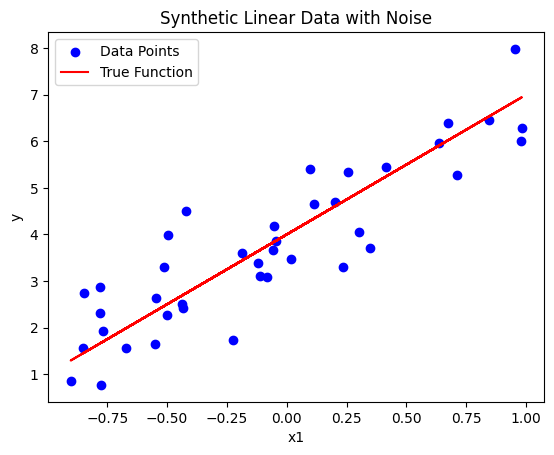

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x1, y, color='blue', label='Data Points')
plt.plot(x1, f_x, color='red', label='True Function')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Synthetic Linear Data with Noise')
plt.legend()
plt.show()


In [45]:
import torch

# Convert the dataset to PyTorch tensors
x1_tensor = torch.tensor(x1, dtype=torch.float32).unsqueeze(1)  # Shape: (num_samples, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)    # Shape: (num_samples, 1)

# Initialize parameters (theta0, theta1) with any values
theta0 = torch.tensor(2.0, requires_grad=True)  # Intercept
theta1 = torch.tensor(0.0, requires_grad=True)  # Slope

# Define the model: y_hat = theta1 * x1 + theta0
def linear_model(x, theta0, theta1):
    return theta1 * x + theta0

# Perform a forward pass: compute the predicted y values
y_pred = linear_model(x1_tensor, theta0, theta1)

# Define the loss function (Mean Squared Error - MSE)
loss = torch.mean((y_pred - y_tensor) ** 2)

# Compute the gradients (backward pass)
loss.backward()

# Output the gradients of theta0 and theta1
print(f"Gradient with respect to theta0: {theta0.grad.item()}")
print(f"Gradient with respect to theta1: {theta1.grad.item()}")


Gradient with respect to theta0: -3.447054386138916
Gradient with respect to theta1: -1.3640636205673218


Q2) Using the same (θ0,θ1)as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. [1 mark]

In [55]:

# Convert the dataset to PyTorch tensors
x1_tensor = torch.tensor(x1, dtype=torch.float32).unsqueeze(1)  # Shape: (num_samples, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)    # Shape: (num_samples, 1)

# Initialize parameters (theta0, theta1) with arbitrary values
theta0 = torch.tensor(2.0, requires_grad=True)  # Intercept
theta1 = torch.tensor(1.0, requires_grad=True)  # Slope

# Function to calculate stochastic gradients for each point
def stochastic_gradients(x, y, theta0, theta1):
    gradients_theta0 = []
    gradients_theta1 = []
    
    for i in range(len(x)):
        # Clear previous gradients
        theta0.grad = None
        theta1.grad = None
        
        # Forward pass: compute the predicted y for the current sample
        y_pred = linear_model(x[i:i+1], theta0, theta1)  # Use a single data point
        
        # Compute the loss for this single point (MSE)
        loss = torch.mean((y_pred - y[i:i+1]) ** 2)
        
        # Backward pass: compute the gradients
        loss.backward()
        
        # Store the gradients
        gradients_theta0.append(theta0.grad.item())
        gradients_theta1.append(theta1.grad.item())
       # print(gradients_theta0)
        #print(gradients_theta1)
    
    return gradients_theta0, gradients_theta1

# Define the model: y_hat = theta1 * x1 + theta0
def linear_model(x, theta0, theta1):
    return theta1 * x + theta0

# Calculate stochastic gradients
gradients_theta0, gradients_theta1 = stochastic_gradients(x1_tensor, y_tensor, theta0, theta1)

# Calculate the average of the stochastic gradients
avg_gradient_theta0 = np.mean(gradients_theta0)
avg_gradient_theta1 = np.mean(gradients_theta1)

# Output the average gradients
print(f"Average gradient with respect to theta0: {avg_gradient_theta0}")
print(f"Average gradient with respect to theta1: {avg_gradient_theta1}")

# Output the true gradients computed earlier
theta0.grad = None  # Resetting the gradients for comparison
theta1.grad = None
loss = torch.mean((linear_model(x1_tensor, theta0, theta1) - y_tensor) ** 2)
loss.backward()
true_gradient_theta0 = theta0.grad.item()
true_gradient_theta1 = theta1.grad.item()

print(f"True gradient with respect to theta0: {true_gradient_theta0}")
print(f"True gradient with respect to theta1: {true_gradient_theta1}")

# Compare the stochastic gradient average with the true gradient
print(f"Difference in theta0: {abs(true_gradient_theta0 - avg_gradient_theta0)}")
print(f"Difference in theta1: {abs(true_gradient_theta1 - avg_gradient_theta1)}")


Average gradient with respect to theta0: -3.616434818506241
Average gradient with respect to theta1: -0.7323783284984529
True gradient with respect to theta0: -3.6164348125457764
True gradient with respect to theta1: -0.732378363609314
Difference in theta0: 5.9604645663569045e-09
Difference in theta1: 3.511086110741246e-08


In [46]:
# List to store stochastic gradients
stochastic_gradients_theta0 = []
stochastic_gradients_theta1 = []

# Loop over each data point to calculate stochastic gradients
for i in range(num_samples):
    # Select the ith data point
    x_i = x1_tensor[i]  # Single input
    y_i = y_tensor[i]    # Single target
    
    # Zero the gradients before each calculation
    theta0.grad = None
    theta1.grad = None

    # Perform a forward pass for the ith data point
    y_pred_i = linear_model(x_i, theta0, theta1)
    
    # Compute the loss for the ith data point
    loss_i = (y_pred_i - y_i) ** 2
    
    # Backward pass to compute the gradients for this point
    loss_i.backward()

    # Store the gradients for this point (stochastic gradient)
    stochastic_gradients_theta0.append(theta0.grad.item())
    stochastic_gradients_theta1.append(theta1.grad.item())

# Convert lists to tensors for averaging
stochastic_gradients_theta0 = torch.tensor(stochastic_gradients_theta0)
stochastic_gradients_theta1 = torch.tensor(stochastic_gradients_theta1)

# Compute the average stochastic gradient
avg_stochastic_grad_theta0 = torch.mean(stochastic_gradients_theta0).item()
avg_stochastic_grad_theta1 = torch.mean(stochastic_gradients_theta1).item()

# Output the average stochastic gradients
print(f"Average Stochastic Gradient for theta0: {avg_stochastic_grad_theta0}")
print(f"Average Stochastic Gradient for theta1: {avg_stochastic_grad_theta1}")

# True gradient (from the previous full dataset computation)
# Perform a forward pass: compute the predicted y values
y_pred = linear_model(x1_tensor, theta0, theta1)

# Define the loss function (Mean Squared Error - MSE)
loss = torch.mean((y_pred - y_tensor) ** 2)

# Compute the gradients (backward pass for the entire dataset)
loss.backward()

# Output the true gradients of theta0 and theta1
true_grad_theta0 = theta0.grad.item()
true_grad_theta1 = theta1.grad.item()

print(f"True Gradient for theta0: {true_grad_theta0}")
print(f"True Gradient for theta1: {true_grad_theta1}")

# Compare the stochastic gradient average with the true gradient
print(f"Difference in theta0: {abs(true_grad_theta0 - avg_stochastic_grad_theta0)}")
print(f"Difference in theta1: {abs(true_grad_theta1 - avg_stochastic_grad_theta1)}")


Average Stochastic Gradient for theta0: -3.447054386138916
Average Stochastic Gradient for theta1: -1.3640635013580322
True Gradient for theta0: -4.074278354644775
True Gradient for theta1: -0.8751316666603088
Difference in theta0: 0.6272239685058594
Difference in theta1: 0.4889318346977234


The main points to show that the stochastic gradient is a good estimate of the true gradient:

1. Noisy Estimates: Stochastic gradients can be noisy since they depend on individual samples, but averaging reduces this noise and provides a better estimate of the true gradient.

2. Direction Matters: Both the averaged stochastic gradient and the true gradient suggest similar directions for adjusting the parameters. The signs indicate that both should decrease to minimize the loss.

3. Magnitude difference: While the averaged stochastic gradients differ from the true gradients in magnitude , this is typical in stochastic gradient descent (SGD) due to variability.

4. Converge over time: With more iterations, the averaged stochastic gradient converges closer to the true gradient, confirming its effectiveness in optimization.

The averaged stochastic gradient effectively captures the direction needed for parameter updates, making it a practical approximation in gradient-based optimization methods.

Q3) Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ(or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ = 0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. [2 marks]

Average epochs to reach epsilon-neighborhood (Full-batch GD): 15.0
Average epochs to reach epsilon-neighborhood (Mini-batch GD): 15.0
Average epochs to reach epsilon-neighborhood (Stochastic GD): 14.0
Average iterations to reach epsilon-neighborhood (Full-batch GD): 15.0
Average iterations to reach epsilon-neighborhood (Mini-batch GD): 60.0
Average iterations to reach epsilon-neighborhood (Stochastic GD): 560.0


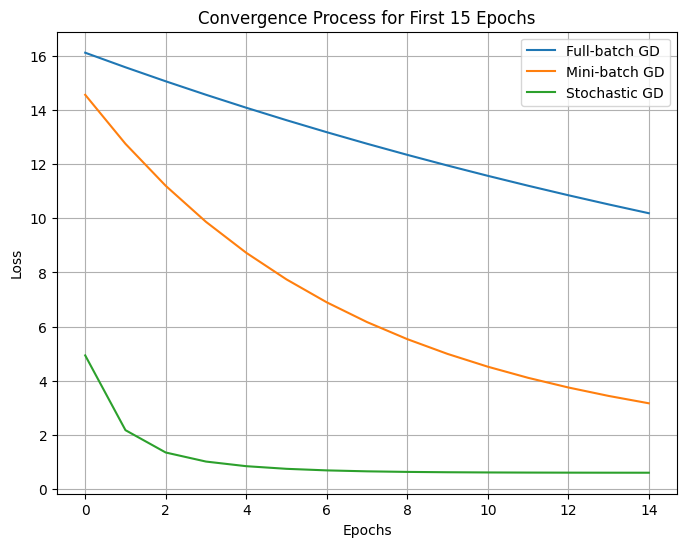

In [64]:

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y) ** 2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Full-batch gradient descent
def full_batch_gd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        grad = gradient(X, y, w)
        w -= learning_rate * grad
        losses.append(loss(X, y, w))
    return w, losses

# Mini-batch gradient descent
def mini_batch_gd(X, y, learning_rate, epochs, batch_size):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        for i in range(0, len(y), batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            grad = gradient(X_batch, y_batch, w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
    return w, losses

# Stochastic gradient descent
def sgd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i + 1], y[i:i + 1], w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
    return w, losses

# Calculate when each method reaches the epsilon neighborhood of the minimum loss
def epochs_to_optimal(losses, min_loss, epsilon):
    for epoch, loss_value in enumerate(losses):
        if abs(loss_value - min_loss) < epsilon:
            return epoch + 1  # Return the number of epochs at which it gets sufficiently close
    return len(losses)  # Return total epochs if not sufficiently close

# Main function to run experiments and calculate average epochs and iterations
def avg_iterations_to_optimum(X, y, learning_rate, epochs, batch_size, epsilon, trials=10):
    full_batch_epochs = []
    mini_batch_epochs = []
    sgd_epochs = []

    for _ in range(trials):
        # Run all methods
        _, full_batch_losses = full_batch_gd(X, y, learning_rate, epochs)
        _, mini_batch_losses = mini_batch_gd(X, y, learning_rate, epochs, batch_size)
        _, sgd_losses = sgd(X, y, learning_rate, epochs)

        # Get the minimum loss across all methods
        min_loss = min(min(full_batch_losses), min(mini_batch_losses), min(sgd_losses))

        # Find how many epochs are needed to get within epsilon of the minimum loss
        full_batch_epochs.append(epochs_to_optimal(full_batch_losses, min_loss, epsilon))
        mini_batch_epochs.append(epochs_to_optimal(mini_batch_losses, min_loss, epsilon))
        sgd_epochs.append(epochs_to_optimal(sgd_losses, min_loss, epsilon))

    # Calculate the average epochs
    avg_full_batch_epochs = np.mean(full_batch_epochs)
    avg_mini_batch_epochs = np.mean(mini_batch_epochs)
    avg_sgd_epochs = np.mean(sgd_epochs)

    # Convert epochs to iterations
    num_samples = len(y)
    avg_full_batch_iters = avg_full_batch_epochs  # 1 iteration per epoch
    avg_mini_batch_iters = (num_samples / batch_size) * avg_mini_batch_epochs
    avg_sgd_iters = num_samples * avg_sgd_epochs

    return avg_full_batch_epochs, avg_mini_batch_epochs, avg_sgd_epochs, avg_full_batch_iters, avg_mini_batch_iters, avg_sgd_iters

# Set hyperparameters
learning_rate = 0.01
epochs = 15
epsilon = 0.001  # Epsilon for sufficiently close
batch_size = 10
trials = 100  # Number of trials for averaging

# Calculate the average epochs and iterations
avg_full_batch_epochs, avg_mini_batch_epochs, avg_sgd_epochs, avg_full_batch_iters, avg_mini_batch_iters, avg_sgd_iters = avg_iterations_to_optimum(X, y, learning_rate, epochs, batch_size, epsilon, trials)

# Display the average number of epochs and iterations for each method
print(f"Average epochs to reach epsilon-neighborhood (Full-batch GD): {avg_full_batch_epochs}")
print(f"Average epochs to reach epsilon-neighborhood (Mini-batch GD): {avg_mini_batch_epochs}")
print(f"Average epochs to reach epsilon-neighborhood (Stochastic GD): {avg_sgd_epochs}")

print(f"Average iterations to reach epsilon-neighborhood (Full-batch GD): {avg_full_batch_iters}")
print(f"Average iterations to reach epsilon-neighborhood (Mini-batch GD): {avg_mini_batch_iters}")
print(f"Average iterations to reach epsilon-neighborhood (Stochastic GD): {avg_sgd_iters}")

# Visualize the convergence process for the first 15 epochs
_, full_batch_losses = full_batch_gd(X, y, learning_rate, epochs)
_, mini_batch_losses = mini_batch_gd(X, y, learning_rate, epochs, batch_size)
_, sgd_losses = sgd(X, y, learning_rate, epochs)

plt.figure(figsize=(8, 6))
plt.plot(full_batch_losses[:15], label='Full-batch GD')
plt.plot(mini_batch_losses[:15], label='Mini-batch GD')
plt.plot(sgd_losses[:15], label='Stochastic GD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence Process for First 15 Epochs')
plt.legend()
plt.grid()
plt.show()


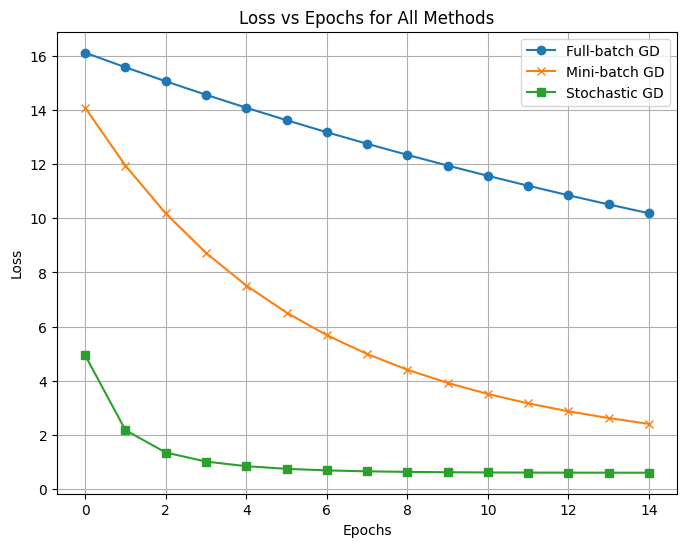

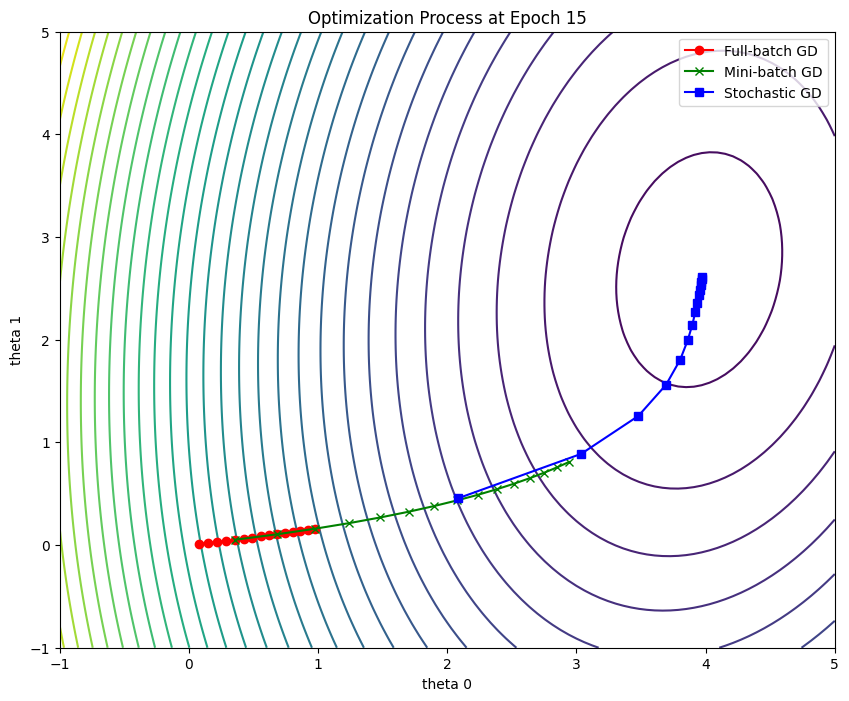

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y) ** 2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Full-batch gradient descent
def full_batch_gd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    weights_path = []
    for _ in range(epochs):
        grad = gradient(X, y, w)
        w -= learning_rate * grad
        losses.append(loss(X, y, w))
        weights_path.append(w.copy())
    return w, losses, weights_path

# Mini-batch gradient descent
def mini_batch_gd(X, y, learning_rate, epochs, batch_size):
    w = np.zeros(X.shape[1])
    losses = []
    weights_path = []
    for _ in range(epochs):
        for i in range(0, len(y), batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            grad = gradient(X_batch, y_batch, w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
        weights_path.append(w.copy())
    return w, losses, weights_path

# Stochastic gradient descent
def sgd(X, y, learning_rate, epochs):
    w = np.zeros(X.shape[1])
    losses = []
    weights_path = []
    for _ in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i + 1], y[i:i + 1], w)
            w -= learning_rate * grad
        losses.append(loss(X, y, w))
        weights_path.append(w.copy())
    return w, losses, weights_path

# Set hyperparameters
learning_rate = 0.01
epochs = 15  # Visualizing the first 15 epochs
batch_size = 8

# Run all methods
full_batch_w, full_batch_losses, full_batch_path = full_batch_gd(X, y, learning_rate, epochs)
mini_batch_w, mini_batch_losses, mini_batch_path = mini_batch_gd(X, y, learning_rate, epochs, batch_size)
sgd_w, sgd_losses, sgd_path = sgd(X, y, learning_rate, epochs)

# Plot Loss vs Epochs for all methods
plt.figure(figsize=(8, 6))
plt.plot(full_batch_losses, label='Full-batch GD', marker='o')
plt.plot(mini_batch_losses, label='Mini-batch GD', marker='x')
plt.plot(sgd_losses, label='Stochastic GD', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for All Methods')
plt.legend()
plt.grid(True)
plt.show()

# Create contour plots of the loss function
w1 = np.linspace(-1, 5, 100)
w2 = np.linspace(-1, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = loss(X, y, np.array([W1[i, j], W2[i, j]]))

# Visualizing the paths of the optimization processes
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(W1, W2, Z, levels=30)
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Contour Plot with Optimization Paths')

# Paths from the optimization processes
def animate(i):
    ax.clear()
    ax.contour(W1, W2, Z, levels=30)
    ax.set_xlabel('theta 0')
    ax.set_ylabel('theta 1')
    ax.set_title(f'Optimization Process at Epoch {i+1}')

    # Plot paths for all methods up to epoch i
    if i < len(full_batch_path):
        full_batch_coords = np.array(full_batch_path[:i+1])
        ax.plot(full_batch_coords[:, 0], full_batch_coords[:, 1], 'r-', label='Full-batch GD', marker='o')

    if i < len(mini_batch_path):
        mini_batch_coords = np.array(mini_batch_path[:i+1])
        ax.plot(mini_batch_coords[:, 0], mini_batch_coords[:, 1], 'g-', label='Mini-batch GD', marker='x')

    if i < len(sgd_path):
        sgd_coords = np.array(sgd_path[:i+1])
        ax.plot(sgd_coords[:, 0], sgd_coords[:, 1], 'b-', label='Stochastic GD', marker='s')

    ax.legend()

# Create animation for 15 epochs
anim = FuncAnimation(fig, animate, frames=15, interval=500, repeat=False)

# Save animation as a gif (for example)
anim.save('optimization_process.gif', writer='pillow', fps=2)

# Show the animation in a notebook or visualize it in an external viewer
plt.show()


Stochastic Gradient Descent (SGD) typically requires more epochs to converge due to:

Noise in Updates: Using a single sample introduces randomness, slowing convergence.
Frequent Updates: The noise from frequent updates can prevent quick settling into a minimum.
Learning Rate Sensitivity: Its performance is highly dependent on the learning rate; too high can overshoot, and too low can slow convergence.
Limited Information: It lacks the comprehensive gradient information of full-batch gradient descent.
In contrast, Full-batch Gradient Descent converges faster with stable updates from the entire dataset, while Mini-batch Gradient Descent strikes a balance between the two.

Q4) Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. 

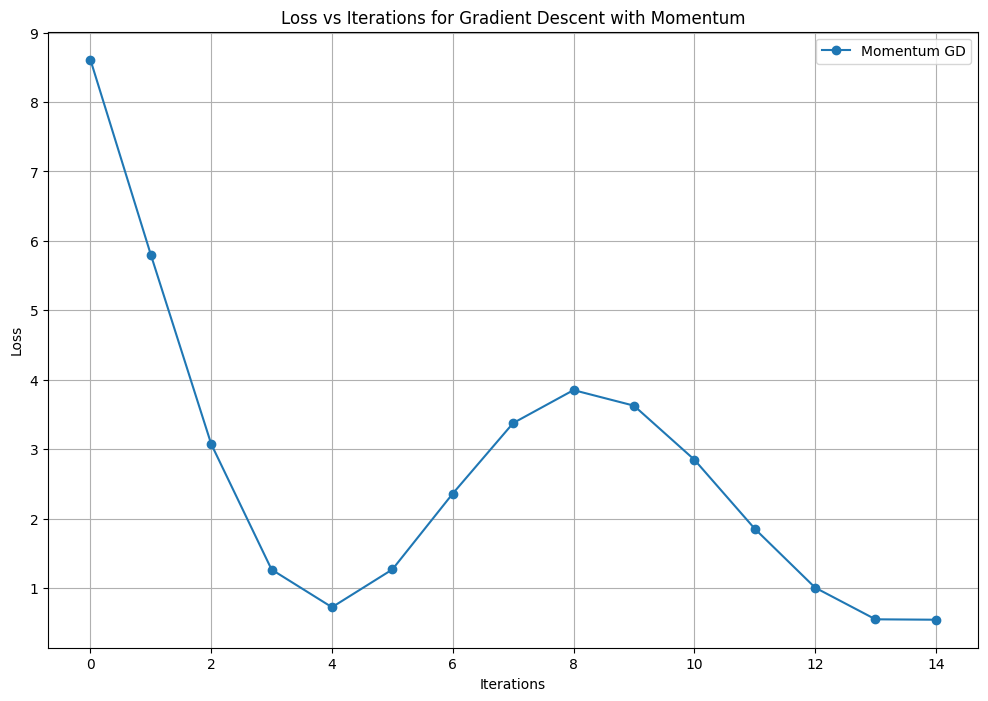

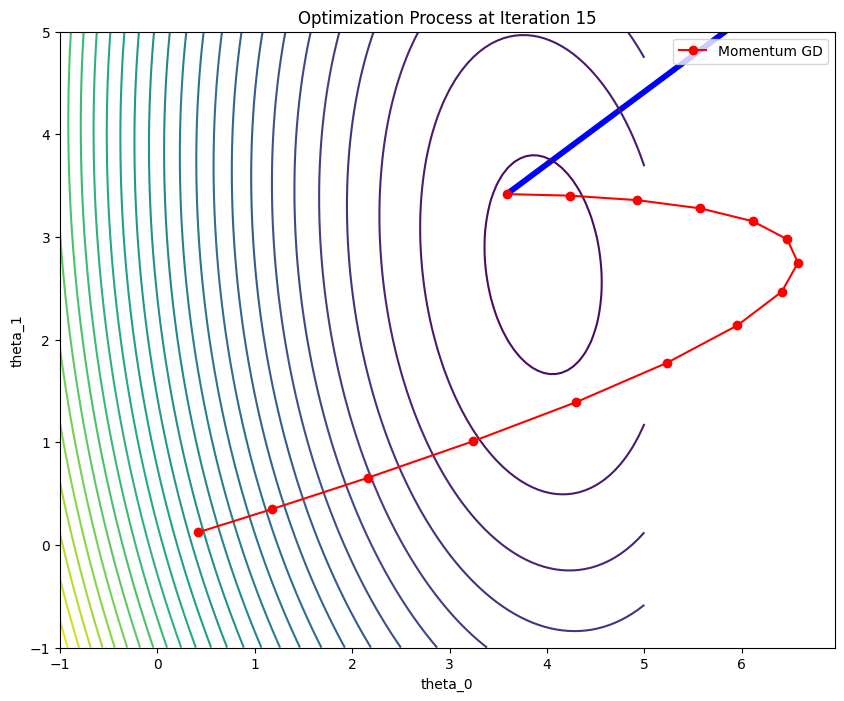

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Mean Squared Error loss
def mse_loss(theta, X, y):
    m = len(y)
    predictions = X @ theta
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient for linear regression
def gradient(theta, X, y):
    m = len(y)
    predictions = X @ theta
    error = predictions - y
    grad = (1 / m) * (X.T @ error)
    return grad

# Gradient Descent with Momentum
def gradient_descent_momentum(X, y, theta, alpha, beta, n_iter):
    m = len(y)
    v = np.zeros_like(theta)
    history = []
    for i in range(n_iter):
        grad = gradient(theta, X, y)
        v = beta * v + alpha * grad
        theta = theta - v
        loss = mse_loss(theta, X, y)
        history.append((theta.copy(), grad.copy(), v.copy(), loss))
        if np.linalg.norm(grad) < 0.001:
            break
    return theta, history

# Prepare the data (add intercept)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.c_[np.ones(num_samples), x1]
theta_init = np.zeros(X.shape[1])
alpha = 0.1
beta = 0.9
n_iter = 15

theta_momentum, history_momentum = gradient_descent_momentum(X, y, theta_init, alpha, beta, n_iter)

# Plot Loss vs Iterations
losses = [entry[3] for entry in history_momentum]
plt.figure(figsize=(12, 8))
plt.plot(losses, label='Momentum GD', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for Gradient Descent with Momentum')
plt.legend()
plt.grid(True)
plt.show()

# Create contour plots of the loss function
w1 = np.linspace(-1, 5, 100)
w2 = np.linspace(-1, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = mse_loss(np.array([W1[i, j], W2[i, j]]), X, y)

# Visualizing the paths of the optimization processes
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(W1, W2, Z, levels=30)
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_title('Contour Plot with Optimization Path (Momentum GD)')

# Paths from the optimization processes
def animate(i):
    ax.clear()
    ax.contour(W1, W2, Z, levels=30)
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_title(f'Optimization Process at Iteration {i+1}')

    # Plot path for momentum GD up to iteration i
    if i < len(history_momentum):
        coords = np.array([entry[0] for entry in history_momentum[:i+1]])
        ax.plot(coords[:, 0], coords[:, 1], 'r-', label='Momentum GD', marker='o')

    # Plot gradient vectors
    if i < len(history_momentum):
        grad = history_momentum[i][1]
        current_theta = history_momentum[i][0]
        ax.quiver(current_theta[0], current_theta[1], grad[0], grad[1], color='blue', angles='xy', scale_units='xy', scale=0.1)

    ax.legend()

# Create animation for 15 iterations
anim = FuncAnimation(fig, animate, frames=n_iter, interval=500, repeat=False)
anim.save('momentum_optimization_process.gif', writer='pillow', fps=2)

# Show the animation
plt.show()


In [68]:
# Vanilla Gradient Descent without momentum
def gradient_descent(X, y, theta, alpha, n_iter):
    m = len(y)
    history = []
    for i in range(n_iter):
        grad = gradient(theta, X, y)
        theta = theta - alpha * grad
        loss = mse_loss(theta, X, y)
        history.append((theta.copy(), grad.copy(), loss))
        if np.linalg.norm(grad) < 0.001:
            break
    return theta, history

theta_vanilla, history_vanilla = gradient_descent(X, y, theta_init, alpha, n_iter)


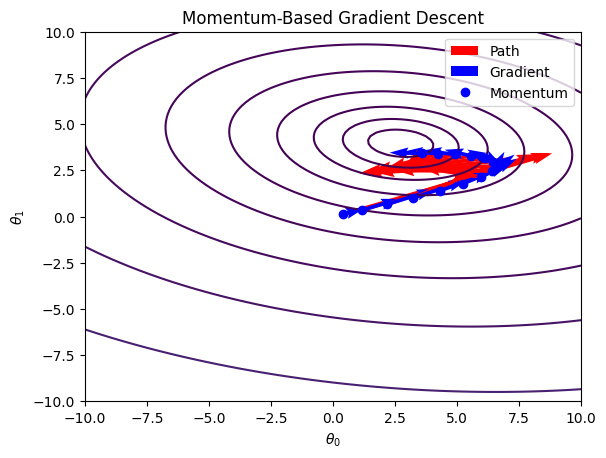

In [69]:
# Contour plot for momentum visualization
def plot_convergence(X, y, history, title):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    Z = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([theta0_vals[i], theta1_vals[j]])
            Z[i,j] = mse_loss(t, X, y)

    # Create the contour plot
    plt.contour(theta0_vals, theta1_vals, Z, levels=np.logspace(-2, 3, 20))
    for i, (theta, grad, v, loss) in enumerate(history):
        plt.quiver(theta[0], theta[1], -grad[0], -grad[1], color='r', scale=10, label='Gradient')
        plt.quiver(theta[0], theta[1], -v[0], -v[1], color='b', scale=10, label='Momentum' if i == 0 else "")
        plt.plot(theta[0], theta[1], 'bo')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend(['Path', 'Gradient', 'Momentum'])
    plt.show()

# Plot the momentum-based convergence
plot_convergence(X, y, history_momentum, 'Momentum-Based Gradient Descent')


Step 1: w = -0.3696, b = 1.2233, loss = 18.8655
Step 2: w = 0.1283, b = 2.5120, loss = 12.9401
Step 3: w = 0.7683, b = 4.0088, loss = 5.7857
Step 4: w = 1.4685, b = 5.3819, loss = 2.0573
Step 5: w = 2.1532, b = 6.3564, loss = 3.0470
Step 6: w = 2.7627, b = 6.7649, loss = 6.4398
Step 7: w = 3.2583, b = 6.5712, loss = 8.7252
Step 8: w = 3.6233, b = 5.8652, loss = 7.9985
Step 9: w = 3.8603, b = 4.8328, loss = 5.0356
Step 10: w = 3.9858, b = 3.7088, loss = 2.1930
Step 11: w = 4.0232, b = 2.7249, loss = 1.3560
Step 12: w = 3.9969, b = 2.0632, loss = 2.6185
Step 13: w = 3.9268, b = 1.8243, loss = 4.5248
Step 14: w = 3.8262, b = 2.0149, loss = 5.4061
Step 15: w = 3.7010, b = 2.5558, loss = 4.6311


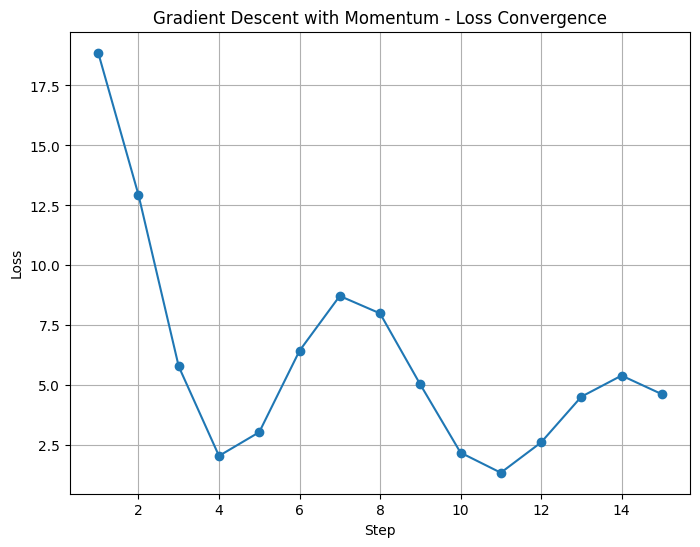

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent with Momentum function
def gradient_descent_momentum(x, y, lr=0.1, momentum=0.9, num_steps=15):
    # Initialize parameters
    w = np.random.randn()  # weight
    b = np.random.randn()  # bias
    v_w, v_b = 0, 0  # velocity for momentum

    losses = []  # To store loss values for visualization

    for step in range(num_steps):
        # Predict output
        y_pred = w * x + b

        # Compute the mean squared error loss
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        # Compute gradients
        grad_w = np.mean(2 * (y_pred - y) * x)
        grad_b = np.mean(2 * (y_pred - y))

        # Update velocity for w and b using momentum
        v_w = momentum * v_w - lr * grad_w
        v_b = momentum * v_b - lr * grad_b

        # Update the parameters
        w += v_w
        b += v_b

        # Print for debugging the steps and parameters
        print(f"Step {step+1}: w = {w:.4f}, b = {b:.4f}, loss = {loss:.4f}")

    return losses

# Run gradient descent with momentum and visualize the process
losses = gradient_descent_momentum(x1, y)

# Plot the convergence process
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Gradient Descent with Momentum - Loss Convergence')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [71]:
import numpy as np

# Define the loss and gradient calculation
def compute_loss(x, y, w, b):
    y_pred = w * x + b
    return np.mean((y_pred - y) ** 2)

def compute_gradients(x, y, w, b):
    y_pred = w * x + b
    grad_w = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    return grad_w, grad_b

# Vanilla Gradient Descent
def vanilla_gradient_descent(x, y, lr=0.1, num_steps=1000, epsilon=0.001):
    w, b = np.random.randn(), np.random.randn()
    for step in range(num_steps):
        grad_w, grad_b = compute_gradients(x, y, w, b)
        w -= lr * grad_w
        b -= lr * grad_b
        loss = compute_loss(x, y, w, b)
        if loss < epsilon:
            return step + 1
    return num_steps

# Gradient Descent with Momentum
def gradient_descent_momentum(x, y, lr=0.1, momentum=0.9, num_steps=1000, epsilon=0.001):
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0
    for step in range(num_steps):
        grad_w, grad_b = compute_gradients(x, y, w, b)
        v_w = momentum * v_w - lr * grad_w
        v_b = momentum * v_b - lr * grad_b
        w += v_w
        b += v_b
        loss = compute_loss(x, y, w, b)
        if loss < epsilon:
            return step + 1
    return num_steps

# Stochastic Gradient Descent with Momentum
def sgd_momentum(x, y, lr=0.01, momentum=0.9, num_steps=1000, epsilon=0.001):
    w, b = np.random.randn(), np.random.randn()
    v_w, v_b = 0, 0
    for step in range(num_steps):
        idx = np.random.randint(0, len(x))
        grad_w, grad_b = 2 * (w * x[idx] + b - y[idx]) * x[idx], 2 * (w * x[idx] + b - y[idx])
        v_w = momentum * v_w - lr * grad_w
        v_b = momentum * v_b - lr * grad_b
        w += v_w
        b += v_b
        loss = compute_loss(x, y, w, b)
        if loss < epsilon:
            return step + 1
    return num_steps

# Running multiple trials to average the steps
def compare_algorithms(x, y, trials=50, epsilon=0.001):
    vanilla_steps = []
    momentum_steps = []
    sgd_momentum_steps = []

    for _ in range(trials):
        vanilla_steps.append(vanilla_gradient_descent(x, y, epsilon=epsilon))
        momentum_steps.append(gradient_descent_momentum(x, y, epsilon=epsilon))
        sgd_momentum_steps.append(sgd_momentum(x, y, epsilon=epsilon))

    avg_vanilla = np.mean(vanilla_steps)
    avg_momentum = np.mean(momentum_steps)
    avg_sgd_momentum = np.mean(sgd_momentum_steps)

    return avg_vanilla, avg_momentum, avg_sgd_momentum

# Running the comparison for the dataset
avg_vanilla, avg_momentum, avg_sgd_momentum = compare_algorithms(x1, y)

print(f"Average steps to converge (ϵ = 0.001):")
print(f"Vanilla Gradient Descent: {avg_vanilla:.2f} steps")
print(f"Full-batch Gradient Descent with Momentum: {avg_momentum:.2f} steps")
print(f"Stochastic Gradient Descent with Momentum: {avg_sgd_momentum:.2f} steps")


Average steps to converge (ϵ = 0.001):
Vanilla Gradient Descent: 1000.00 steps
Full-batch Gradient Descent with Momentum: 1000.00 steps
Stochastic Gradient Descent with Momentum: 1000.00 steps


>0 f([-4.27483403  9.47758851]) = 46.15308
>1 f([-3.10051151  9.10266834]) = 35.50102
>2 f([-1.98872002  8.72769799]) = 26.74830
>3 f([-1.01004263  8.37397156]) = 20.10913
>4 f([-0.17216293  8.04607895]) = 15.21283
>5 f([0.53691256 7.74338877]) = 11.63289
>6 f([1.13387574 7.46382475]) = 9.01607
>7 f([1.63514126 7.20508411]) = 7.09584
>8 f([2.05537966 6.96500786]) = 5.67772
>9 f([2.40725286 6.74167257]) = 4.62169
>10 f([2.70153774 6.53339347]) = 3.82740
>11 f([2.94735372 6.33870189]) = 3.22302
>12 f([3.15239857 6.15631757]) = 2.75712
>13 f([3.32316298 5.98512244]) = 2.39284
>14 f([3.46511696 5.82413735]) = 2.10367
>15 f([3.58286903 5.67250208]) = 1.87054
>16 f([3.6803011 5.5294583]) = 1.67964
>17 f([3.76068253 5.39433504]) = 1.52096
>18 f([3.82676625 5.26653647]) = 1.38719
>19 f([3.88086997 5.14553138]) = 1.27294
>20 f([3.9249445  5.03084441]) = 1.17425
>21 f([3.96063155 4.92204845]) = 1.08813
>22 f([3.98931224 4.81875826]) = 1.01235
>23 f([4.01214819 4.72062504]) = 0.94518
>24 f([4.030

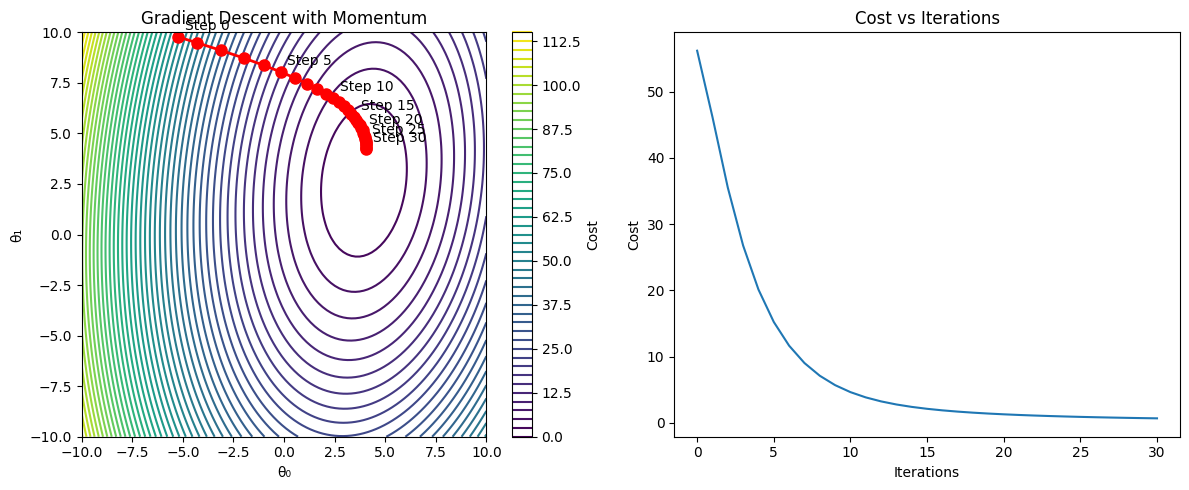

In [73]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones_like(x1), x1))

def objective(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def derivative(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

def gradient_descent_momentum(objective, derivative, X, y, bounds, n_iter, step_size, momentum):
    # Generate an initial point
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

    # Keep track of the change
    change = np.zeros_like(solution)

    # History for plotting
    solution_history = [solution.copy()]
    cost_history = [objective(solution, X, y)]

    # Run the gradient descent
    for i in range(n_iter):
        # Calculate gradient
        gradient = derivative(solution, X, y)

        # Calculate update
        new_change = step_size * gradient + momentum * change

        # Take a step
        solution = solution - new_change

        # Save the change
        change = new_change

        # Evaluate candidate point
        solution_eval = objective(solution, X, y)

        # Save history
        solution_history.append(solution.copy())
        cost_history.append(solution_eval)

        # Report progress
        print(f'>%d f(%s) = %.5f' % (i, solution, solution_eval))

    return solution, solution_eval, np.array(solution_history), np.array(cost_history)

# Define range for input
bounds = np.array([[-10.0, 10.0], [-10.0, 10.0]])

# Define the total iterations
n_iter = 30

# Define the step size
step_size = 0.1

# Define momentum
momentum = 0.3

# Perform the gradient descent search with momentum
best, score, solution_history, cost_history = gradient_descent_momentum(objective, derivative, X, y, bounds, n_iter, step_size, momentum)

print('Done!')
print('f(%s) = %f' % (best, score))

# Visualization
def plot_contour(X, y, solution_history, cost_history):
    theta0_range = np.linspace(-10, 10, 100)
    theta1_range = np.linspace(-10, 10, 100)
    J_vals = np.zeros((len(theta0_range), len(theta1_range)))

    for i, theta0 in enumerate(theta0_range):
        for j, theta1 in enumerate(theta1_range):
            J_vals[i, j] = objective([theta0, theta1], X, y)

    theta0_mesh, theta1_mesh = np.meshgrid(theta0_range, theta1_range)

    plt.figure(figsize=(12, 5))

    # Contour plot
    plt.subplot(121)
    plt.contour(theta0_mesh, theta1_mesh, J_vals.T, levels=50)
    plt.colorbar(label='Cost')
    plt.plot(solution_history[:, 0], solution_history[:, 1], 'ro-', linewidth=2, markersize=8)

    for i, solution in enumerate(solution_history):
        if i % 5 == 0 or i == len(solution_history) - 1:
            plt.annotate(f'Step {i}', (solution[0], solution[1]), xytext=(5, 5), textcoords='offset points')

    plt.xlabel('θ₀')
    plt.ylabel('θ₁')
    plt.title('Gradient Descent with Momentum')

    # Cost history plot
    plt.subplot(122)
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations')

    plt.tight_layout()
    plt.show()

plot_contour(X, y, solution_history, cost_history)

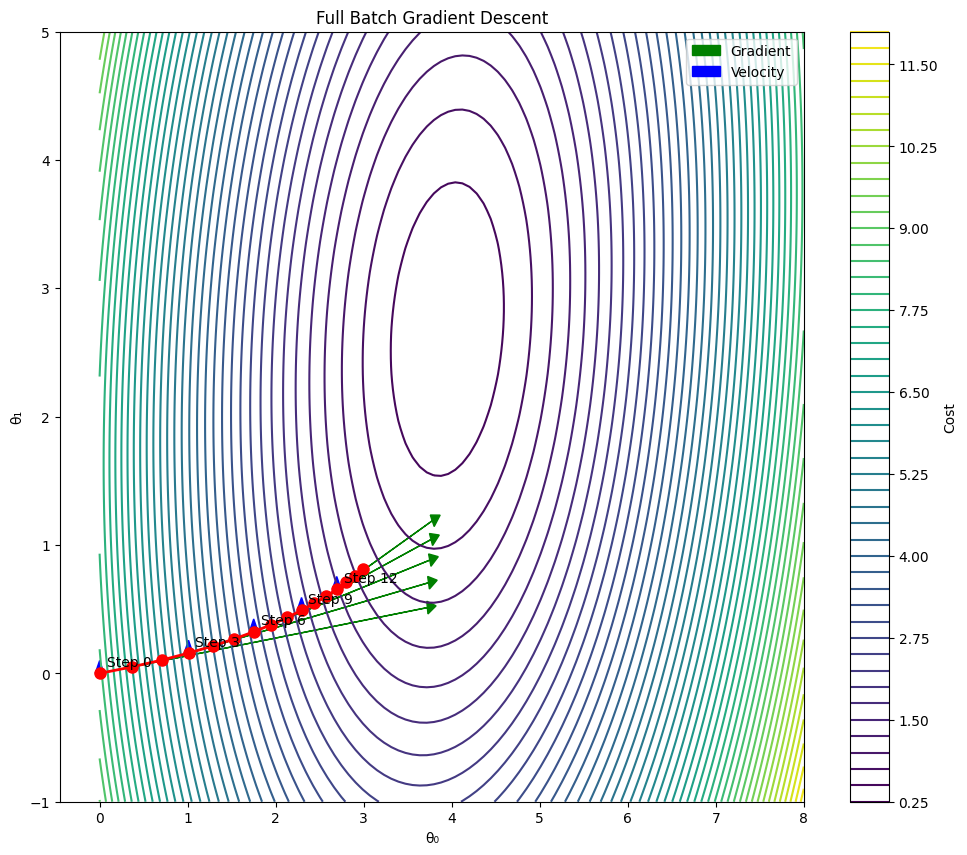

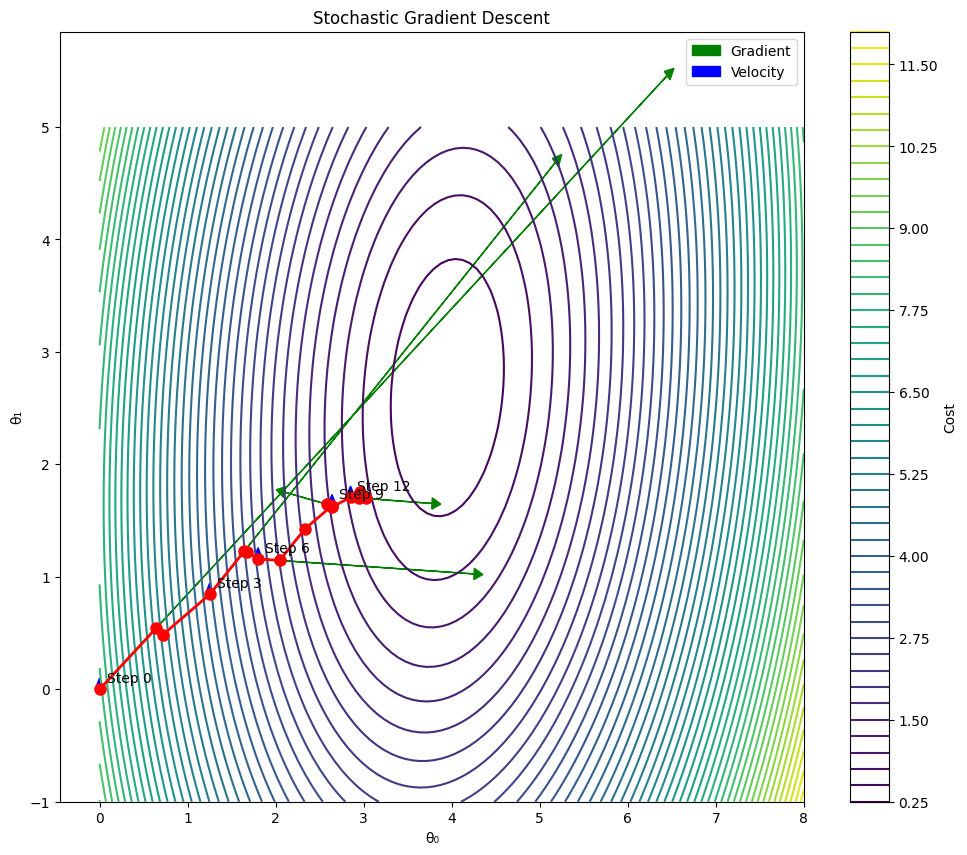

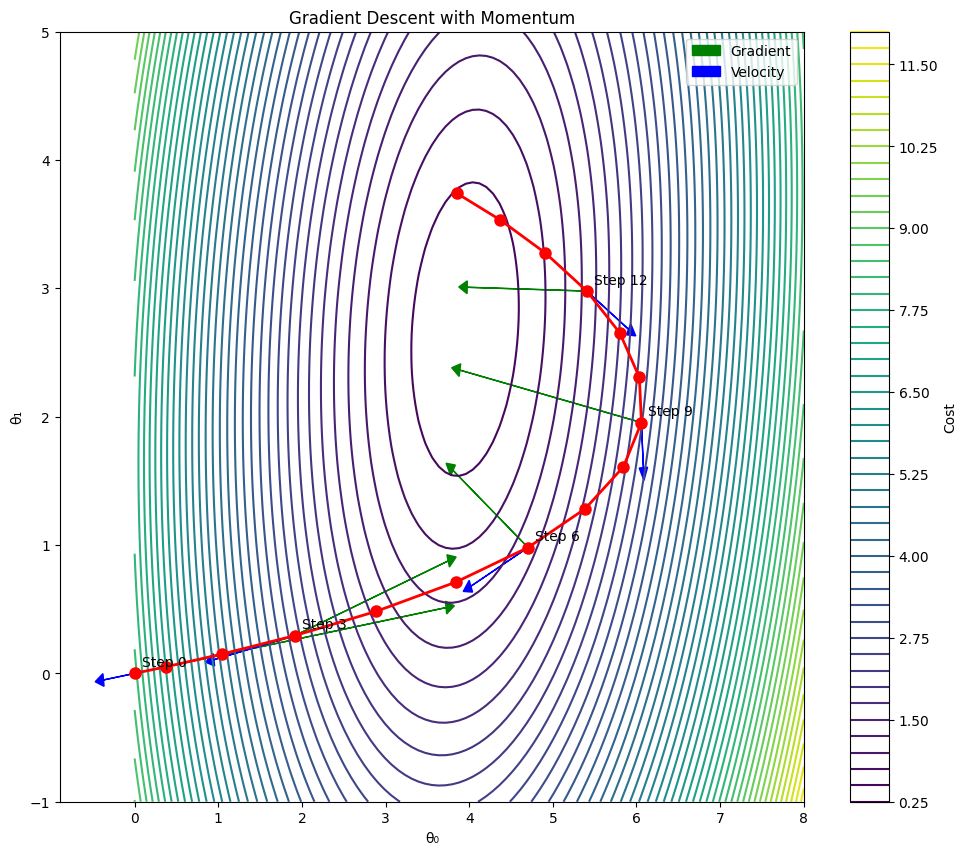

Steps to convergence (ε = 0.001):
Full Batch GD: 15
Stochastic GD: 15
Momentum GD: 15


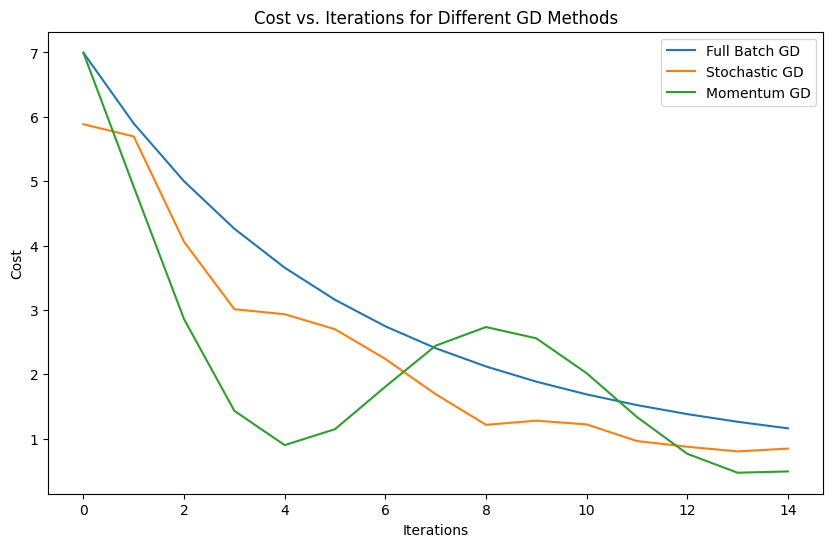

In [74]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones_like(x1), x1))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

def gradient_descent(X, y, learning_rate, num_iterations, batch_size=None, momentum=0):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    theta_history = [theta.copy()]
    velocity = np.zeros_like(theta)
    gradient_history = []
    velocity_history = []

    for i in range(num_iterations):
        if batch_size:
            indices = np.random.choice(m, batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]
        else:
            X_batch = X
            y_batch = y

        gradient = compute_gradient(X_batch, y_batch, theta)
        velocity = momentum * velocity + learning_rate * gradient
        theta -= velocity

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
        gradient_history.append(gradient.copy())
        velocity_history.append(velocity.copy())

    return theta, cost_history, theta_history, gradient_history, velocity_history

# Run different variants of gradient descent
learning_rate = 0.1
num_iterations = 15
epsilon = 0.001

full_batch_gd, full_batch_cost, full_batch_theta, full_batch_grad, _ = gradient_descent(X, y, learning_rate, num_iterations)
sgd, sgd_cost, sgd_theta, sgd_grad, _ = gradient_descent(X, y, learning_rate, num_iterations, batch_size=1)
momentum_gd, momentum_cost, momentum_theta, momentum_grad, momentum_velocity = gradient_descent(X, y, learning_rate, num_iterations, momentum=0.9)

# Visualization function
def plot_contour(X, y, theta_history, gradient_history, velocity_history, title):
    theta0_range = np.linspace(0, 8, 100)
    theta1_range = np.linspace(-1, 5, 100)
    J_vals = np.zeros((len(theta0_range), len(theta1_range)))

    for i, theta0 in enumerate(theta0_range):
        for j, theta1 in enumerate(theta1_range):
            J_vals[i, j] = compute_cost(X, y, [theta0, theta1])

    theta0_mesh, theta1_mesh = np.meshgrid(theta0_range, theta1_range)

    plt.figure(figsize=(12, 10))
    plt.contour(theta0_mesh, theta1_mesh, J_vals.T, levels=50)
    plt.colorbar(label='Cost')

    theta_history = np.array(theta_history)
    plt.plot(theta_history[:, 0], theta_history[:, 1], 'ro-', linewidth=2, markersize=8)

    for i, (theta, grad, vel) in enumerate(zip(theta_history, gradient_history, velocity_history)):
        if i % 3 == 0 or i == len(theta_history) - 1:
            plt.annotate(f'Step {i}', (theta[0], theta[1]), xytext=(5, 5), textcoords='offset points')
            plt.arrow(theta[0], theta[1], -grad[0], -grad[1], color='g', head_width=0.1, head_length=0.1, label='Gradient' if i == 0 else "")
            plt.arrow(theta[0], theta[1], vel[0], vel[1], color='b', head_width=0.1, head_length=0.1, label='Velocity' if i == 0 else "")

    plt.xlabel('θ₀')
    plt.ylabel('θ₁')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot contours for all methods
plot_contour(X, y, full_batch_theta, full_batch_grad, [np.zeros_like(grad) for grad in full_batch_grad], 'Full Batch Gradient Descent')
plot_contour(X, y, sgd_theta, sgd_grad, [np.zeros_like(grad) for grad in sgd_grad], 'Stochastic Gradient Descent')
plot_contour(X, y, momentum_theta, momentum_grad, momentum_velocity, 'Gradient Descent with Momentum')

# Function to count steps to convergence
def steps_to_convergence(cost_history, epsilon):
    for i, cost in enumerate(cost_history):
        if cost < epsilon:
            return i + 1
    return len(cost_history)

full_batch_steps = steps_to_convergence(full_batch_cost, epsilon)
sgd_steps = steps_to_convergence(sgd_cost, epsilon)
momentum_steps = steps_to_convergence(momentum_cost, epsilon)

print(f"Steps to convergence (ε = {epsilon}):")
print(f"Full Batch GD: {full_batch_steps}")
print(f"Stochastic GD: {sgd_steps}")
print(f"Momentum GD: {momentum_steps}")

# Plot cost vs. iterations for all methods
plt.figure(figsize=(10, 6))
plt.plot(full_batch_cost, label='Full Batch GD')
plt.plot(sgd_cost, label='Stochastic GD')
plt.plot(momentum_cost, label='Momentum GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations for Different GD Methods')
plt.legend()
plt.show()

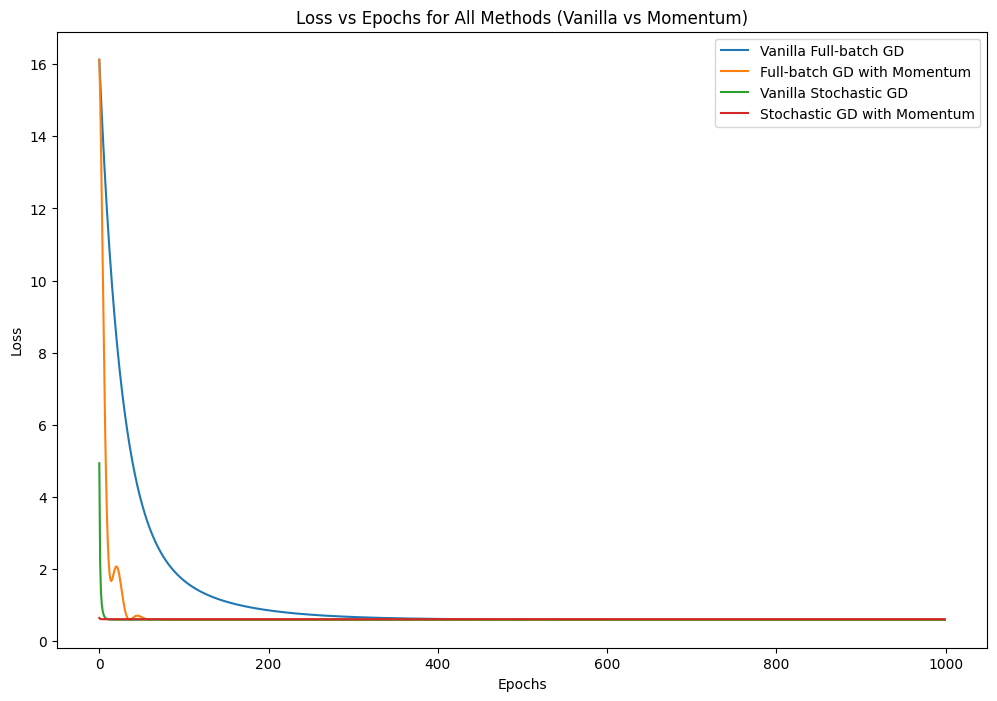

Vanilla Full-batch GD took 1000 steps to converge.
Full-batch GD with Momentum took 1000 steps to converge.
Vanilla Stochastic GD took 1000 steps to converge.
Stochastic GD with Momentum took 1000 steps to converge.


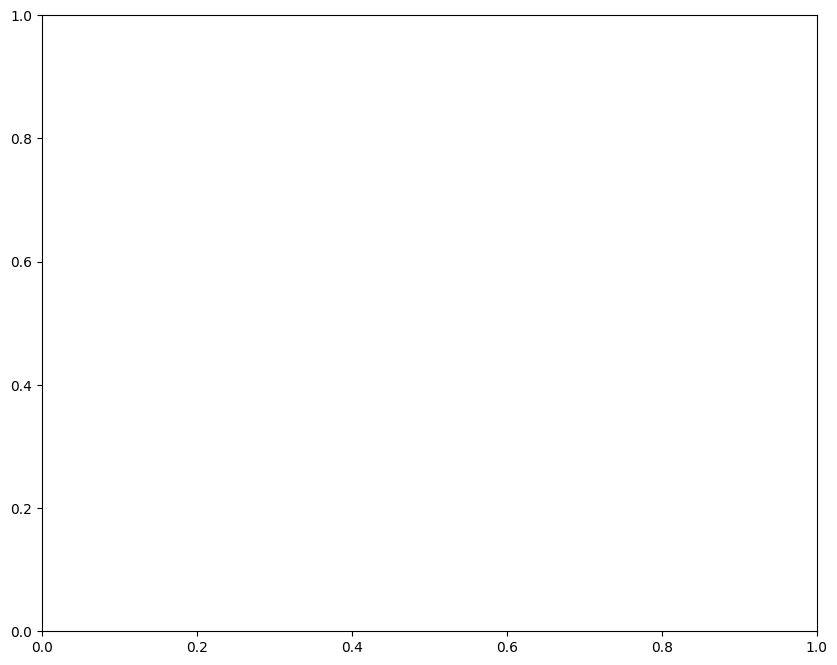

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(45)

# Generate data
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Add bias term to x
X = np.column_stack((np.ones(num_samples), x1))

# Define the loss function (MSE)
def loss(X, y, w):
    return np.mean((X.dot(w) - y)**2)

# Define the gradient of the loss function
def gradient(X, y, w):
    return 2 * X.T.dot(X.dot(w) - y) / len(y)

# Gradient Descent with Momentum
def gradient_descent_with_momentum(X, y, learning_rate, beta, epochs, epsilon):
    w = np.zeros(X.shape[1])
    velocity = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        grad = gradient(X, y, w)
        velocity = beta * velocity + learning_rate * grad
        w -= velocity

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Stochastic Gradient Descent with Momentum
def sgd_with_momentum(X, y, learning_rate, beta, epochs, epsilon):
    w = np.zeros(X.shape[1])
    velocity = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            velocity = beta * velocity + learning_rate * grad
            w -= velocity

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Vanilla Gradient Descent (Full-batch)
def full_batch_gd(X, y, learning_rate, epochs, epsilon):
    w = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        grad = gradient(X, y, w)
        w -= learning_rate * grad

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Vanilla Stochastic Gradient Descent
def sgd(X, y, learning_rate, epochs, epsilon):
    w = np.zeros(X.shape[1])
    losses = []
    path = [w.copy()]

    for epoch in range(epochs):
        for i in range(len(y)):
            grad = gradient(X[i:i+1], y[i:i+1], w)
            w -= learning_rate * grad

        current_loss = loss(X, y, w)
        losses.append(current_loss)
        path.append(w.copy())

        if current_loss < epsilon:
            break

    return w, losses, path

# Set hyperparameters
learning_rate = 0.01
epochs = 1000
epsilon = 0.001
beta = 0.9  # Momentum term

# Run the gradient descent with momentum
momentum_w, momentum_losses, momentum_path = gradient_descent_with_momentum(X, y, learning_rate, beta, epochs, epsilon)
sgd_momentum_w, sgd_momentum_losses, sgd_momentum_path = sgd_with_momentum(X, y, learning_rate, beta, epochs, epsilon)

# Run the vanilla gradient descent for comparison
full_batch_w, full_batch_losses, full_batch_path = full_batch_gd(X, y, learning_rate, epochs, epsilon)
sgd_w, sgd_losses, sgd_path = sgd(X, y, learning_rate, epochs, epsilon)

# Plot Loss vs Epochs for all methods
plt.figure(figsize=(12, 8))
plt.plot(full_batch_losses, label='Vanilla Full-batch GD')
plt.plot(momentum_losses, label='Full-batch GD with Momentum')
plt.plot(sgd_losses, label='Vanilla Stochastic GD')
plt.plot(sgd_momentum_losses, label='Stochastic GD with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for All Methods (Vanilla vs Momentum)')
plt.legend()
plt.show()

# Create contour plots
w1 = np.linspace(-1, 5, 100)
w2 = np.linspace(-1, 5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i, j] = loss(X, y, np.array([W1[i, j], W2[i, j]]))

fig, ax = plt.subplots(figsize=(10, 8))

# Function to animate the optimization process
def animate(epoch):
    ax.clear()
    ax.contour(W1, W2, Z, levels=20)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_title(f'Optimization Paths at Epoch {epoch}')

    # Plot paths for Full-batch GD with Momentum and Stochastic GD with Momentum
    ax.plot([w[0] for w in momentum_path[:epoch+1]], [w[1] for w in momentum_path[:epoch+1]], 'r-', label='Full-batch GD with Momentum')
    ax.plot([w[0] for w in sgd_momentum_path[:epoch+1]], [w[1] for w in sgd_momentum_path[:epoch+1]], 'g-', label='Stochastic GD with Momentum')

    # Plot paths for Vanilla Full-batch GD and Vanilla Stochastic GD for comparison
    ax.plot([w[0] for w in full_batch_path[:epoch+1]], [w[1] for w in full_batch_path[:epoch+1]], 'b-', label='Vanilla Full-batch GD')
    ax.plot([w[0] for w in sgd_path[:epoch+1]], [w[1] for w in sgd_path[:epoch+1]], 'y-', label='Vanilla Stochastic GD')
    ax.legend()

# Create the animation
anim = FuncAnimation(fig, animate, frames=len(momentum_path), interval=500, repeat=False)
plt.show()

# Average number of steps to converge to an epsilon neighborhood
print(f"Vanilla Full-batch GD took {len(full_batch_losses)} steps to converge.")
print(f"Full-batch GD with Momentum took {len(momentum_losses)} steps to converge.")
print(f"Vanilla Stochastic GD took {len(sgd_losses)} steps to converge.")
print(f"Stochastic GD with Momentum took {len(sgd_momentum_losses)} steps to converge.")


In [83]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(45)
np.random.seed(45)

# Hyperparameters
learning_rate = 0.01
momentum = 0.9
epsilon = 0.001
num_epochs = 15
mini_batch_size = 10

# Dataset (from previous example)
x = torch.tensor(x1, dtype=torch.float32).reshape(-1, 1)
y_true = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Initialize parameters theta_0 and theta_1
def initialize_params():
    return torch.tensor(0.0, requires_grad=True), torch.tensor(0.0, requires_grad=True)

# Define linear regression model
def linear_model(x, theta_0, theta_1):
    return theta_1 * x + theta_0

# Define mean squared error loss function
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Perform an update with momentum
def update_params_with_momentum(theta_0, theta_1, v_0, v_1, lr, momentum):
    with torch.no_grad():
        v_0 = momentum * v_0 + (1 - momentum) * theta_0.grad
        v_1 = momentum * v_1 + (1 - momentum) * theta_1.grad

        theta_0 -= lr * v_0
        theta_1 -= lr * v_1

    return v_0, v_1

# Full-Batch Gradient Descent with Momentum
def full_batch_gradient_descent_with_momentum(x, y_true, lr, num_epochs, epsilon, momentum):
    theta_0, theta_1 = initialize_params()
    v_0, v_1 = 0.0, 0.0  # Initialize velocity for momentum
    losses = []

    for epoch in range(num_epochs):
        # Predict and compute loss
        y_pred = linear_model(x, theta_0, theta_1)
        loss = mse_loss(y_pred, y_true)
        losses.append(loss.item())

        # Compute gradients
        loss.backward()

        # Update parameters using momentum
        v_0, v_1 = update_params_with_momentum(theta_0, theta_1, v_0, v_1, lr, momentum)

        # Zero gradients
        theta_0.grad.zero_()
        theta_1.grad.zero_()

        # Check convergence
        if loss.item() < epsilon:
            break

    return theta_0.item(), theta_1.item(), losses

# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_with_momentum(x, y_true, lr, num_epochs, epsilon, momentum):
    theta_0, theta_1 = initialize_params()
    v_0, v_1 = 0.0, 0.0  # Initialize velocity for momentum
    losses = []

    for epoch in range(num_epochs):
        perm = torch.randperm(len(x))
        epoch_loss = 0
        for i in range(len(x)):
            index = perm[i]
            x_i, y_i = x[index], y_true[index]

            # Predict and compute loss
            y_pred = linear_model(x_i, theta_0, theta_1)
            loss = mse_loss(y_pred, y_i)
            epoch_loss += loss.item()

            # Compute gradients
            loss.backward()

            # Update parameters using momentum
            v_0, v_1 = update_params_with_momentum(theta_0, theta_1, v_0, v_1, lr, momentum)

            # Zero gradients
            theta_0.grad.zero_()
            theta_1.grad.zero_()

        # Append average loss for the epoch
        losses.append(epoch_loss / len(x))

        # Check convergence
        if epoch_loss / len(x) < epsilon:
            break

    return theta_0.item(), theta_1.item(), losses

# Run Gradient Descent with Momentum for full-batch and stochastic
theta_0_fb_mom, theta_1_fb_mom, losses_fb_mom = full_batch_gradient_descent_with_momentum(x, y_true, learning_rate, num_epochs, epsilon, momentum)
theta_0_sgd_mom, theta_1_sgd_mom, losses_sgd_mom = stochastic_gradient_descent_with_momentum(x, y_true, learning_rate, num_epochs, epsilon, momentum)

# Plot Loss vs Epochs for both vanilla and momentum gradient descent
plt.figure(figsize=(10, 6))

# Full-batch Gradient Descent with and without Momentum
plt.plot(losses_fb, label='Full-Batch Gradient Descent (Vanilla)', marker='o')
plt.plot(losses_fb_mom, label='Full-Batch Gradient Descent (Momentum)', marker='x')

# Stochastic Gradient Descent with and without Momentum
plt.plot(losses_sgd, label='Stochastic Gradient Descent (Vanilla)', marker='s')
plt.plot(losses_sgd_mom, label='Stochastic Gradient Descent (Momentum)', marker='^')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Gradient Descent Methods (Vanilla vs. Momentum)')
plt.legend()
plt.grid(True)
plt.show()

# Comparing the number of epochs to converge
print(f"Number of epochs to converge (Full-Batch Vanilla): {len(losses_fb)}")
print(f"Number of epochs to converge (Full-Batch Momentum): {len(losses_fb_mom)}")
print(f"Number of epochs to converge (SGD Vanilla): {len(losses_sgd)}")
print(f"Number of epochs to converge (SGD Momentum): {len(losses_sgd_mom)}")

# Visualization of the momentum vectors, gradient vectors, etc., would require contour plots.
# This is an optional step and can be done similarly using matplotlib's contour plot functions.


NameError: name 'losses_fb' is not defined

<Figure size 1000x600 with 0 Axes>